# 第三题

       id   carid  startday starttime  startweidu  startjingdu    endday  \
0       4  459074  1/5/2018  06:09:49   39.970322   116.351395  1/5/2018   
1       3  420604  1/5/2018  06:07:14   39.756088   116.312943  1/5/2018   
2       5  165558  1/5/2018  06:17:56   39.953842   116.436539  1/5/2018   
3      29  258590  1/5/2018  08:09:42   39.850845   116.488724  1/5/2018   
4      28  373864  1/5/2018  08:08:09   39.986801   116.442032  1/5/2018   
...   ...     ...       ...       ...         ...          ...       ...   
7543  759  299501  3/5/2018  13:57:37   39.955215   116.358261  3/5/2018   
7544  757  375130  3/5/2018  13:48:34   39.787674   116.326675  3/5/2018   
7545  756   29137  3/5/2018  13:47:58   39.776688   116.514816  3/5/2018   
7546  755  119594  3/5/2018  13:46:46   39.930496   116.236038  3/5/2018   
7547  758  373632  3/5/2018  13:49:44   39.925003   116.509323  3/5/2018   

       endtime   endweidu   endjingdu  行驶距离（km）  收取费用(元)      公里数单价  
0     07:00:24  3

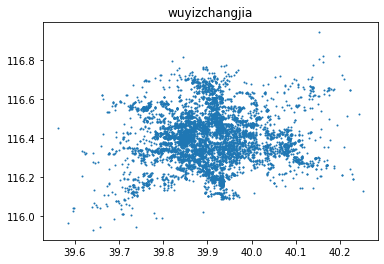

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv(r'E:\OneDrive\桌面\4.17 2022数模大作业\B题  共享汽车运营策略探讨\附件3：B题数据.csv',encoding = 'gb2312')
print(data)
plt.scatter(data['startweidu'],data['startjingdu'],s=1)
plt.title('wuyizchangjia')
plt.savefig('dingjia')
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import time
from sklearn.cluster import DBSCAN,KMeans,k_means
from sklearn.preprocessing import scale
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 导入轮廓系数所需要的库
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [3]:
print(data[['startweidu','startjingdu']])

      startweidu  startjingdu
0      39.970322   116.351395
1      39.756088   116.312943
2      39.953842   116.436539
3      39.850845   116.488724
4      39.986801   116.442032
...          ...          ...
7543   39.955215   116.358261
7544   39.787674   116.326675
7545   39.776688   116.514816
7546   39.930496   116.236038
7547   39.925003   116.509323

[7548 rows x 2 columns]


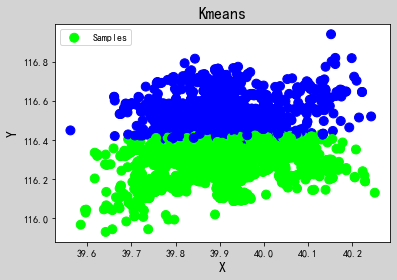

1    4537
0    3011
dtype: int64
[[ 39.89799333 116.52174458]
 [ 39.90338858 116.31625866]]
0.34682071003815956
[0.35337589 0.33555894 0.17873129 ... 0.3967463  0.53004842 0.51618338]
(7548,)


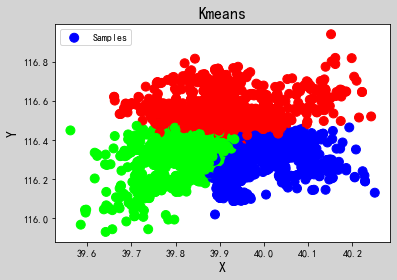

2    2869
1    2553
0    2126
dtype: int64
[[ 39.98541365 116.29984521]
 [ 39.90408744 116.53830608]
 [ 39.83639925 116.3473981 ]]
0.33533186405733884
[0.29121423 0.50714227 0.1239446  ... 0.16547529 0.26216989 0.4677775 ]
(7548,)


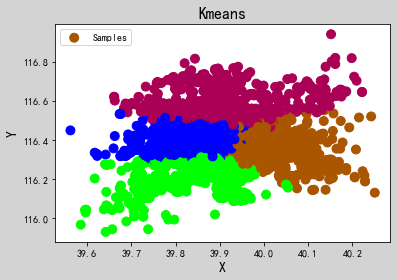

0    2879
1    1694
2    1553
3    1422
dtype: int64
[[ 39.85245618 116.40225507]
 [ 39.90366678 116.57584991]
 [ 40.0179547  116.36121183]
 [ 39.86949252 116.22011441]]
0.3798410020121185
[ 0.368263    0.15981282 -0.00663072 ...  0.10345067  0.44304098
  0.189224  ]
(7548,)


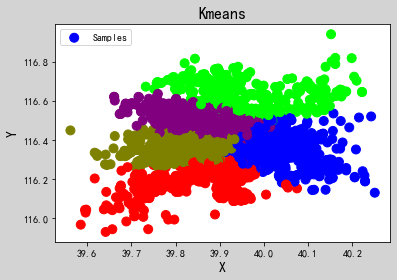

3    2321
1    1708
0    1514
2    1161
4     844
dtype: int64
[[ 40.01960835 116.35953442]
 [ 39.87188534 116.49284523]
 [ 39.87493102 116.20303557]
 [ 39.84419721 116.36979829]
 [ 39.94204264 116.62608552]]
0.35232320714503984
[ 0.35082101  0.36174824 -0.09220156 ...  0.30329581  0.45676743
  0.4140761 ]
(7548,)


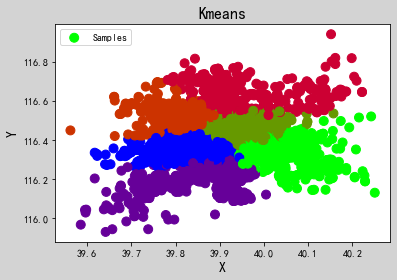

0    2391
4    1360
1    1151
5    1071
2     833
3     742
dtype: int64
[[ 39.84740003 116.36819273]
 [ 39.87427451 116.20290563]
 [ 39.93923654 116.62648922]
 [ 39.80861988 116.51777785]
 [ 39.93687668 116.4605844 ]
 [ 40.03985801 116.33764631]]
0.36447380748760716
[0.22977177 0.3500666  0.55512943 ... 0.57659938 0.44066953 0.45220576]
(7548,)


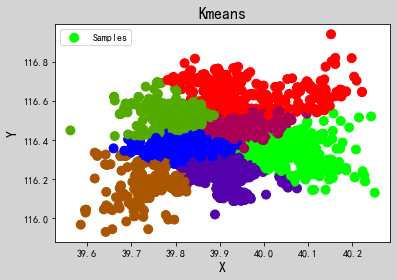

0    2244
2    1354
1    1147
6     965
3     833
5     728
4     277
dtype: int64
[[ 39.84765507 116.37404416]
 [ 39.90998193 116.23140425]
 [ 39.9368951  116.46056216]
 [ 39.93926187 116.62658866]
 [ 39.74074408 116.17539526]
 [ 39.80818654 116.51905689]
 [ 40.04865327 116.34279097]]
0.3739679358754148
[0.19103664 0.21238338 0.54489174 ... 0.56199482 0.61692408 0.45404175]
(7548,)


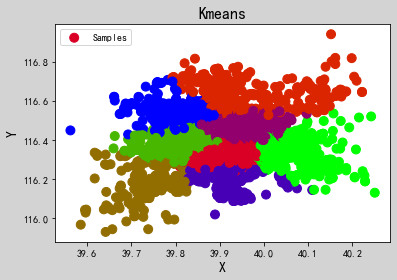

6    1748
2    1345
3    1234
4     818
7     770
1     735
0     616
5     282
dtype: int64
[[ 39.80453343 116.53186243]
 [ 39.91296667 116.19847356]
 [ 39.93528332 116.46472386]
 [ 39.90915011 116.32313646]
 [ 39.94031575 116.6271844 ]
 [ 39.74191219 116.17685521]
 [ 39.83238963 116.39091273]
 [ 40.06851553 116.34278572]]
0.3786398264885477
[0.33291646 0.23260064 0.52336076 ... 0.50782842 0.37618879 0.49010392]
(7548,)


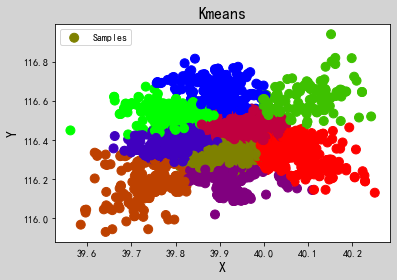

1    1740
3    1341
6    1233
4     763
2     735
0     694
8     596
5     282
7     164
dtype: int64
[[ 39.90587394 116.62893004]
 [ 39.83262261 116.39067503]
 [ 39.91296524 116.19838871]
 [ 39.93428531 116.46467119]
 [ 40.0674784  116.34100689]
 [ 39.74191219 116.17685521]
 [ 39.90902851 116.32305157]
 [ 40.08432156 116.60945614]
 [ 39.80317647 116.52676346]]
0.39022185847434787
[0.32480996 0.23371668 0.52635051 ... 0.5292724  0.37625657 0.4791537 ]
(7548,)


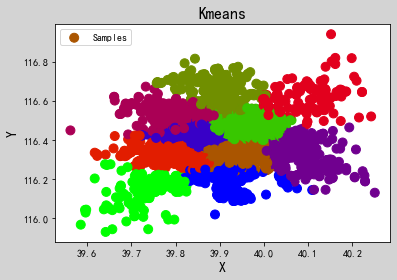

1    1652
8    1110
6    1060
0     741
5     727
2     681
7     675
3     516
9     231
4     155
dtype: int64
[[ 39.91266567 116.19892414]
 [ 39.85085861 116.41621979]
 [ 40.07597633 116.3416828 ]
 [ 39.79784855 116.53531718]
 [ 40.08814116 116.61384386]
 [ 39.80767607 116.32460977]
 [ 39.92998802 116.32927846]
 [ 39.90463155 116.63096619]
 [ 39.94739636 116.47054683]
 [ 39.74419829 116.15201182]]
0.4016977404875742
[0.49426368 0.49264412 0.47709765 ... 0.48669432 0.38260354 0.48456181]
(7548,)


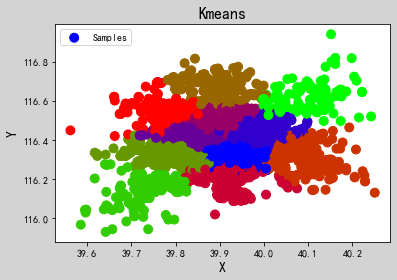

2     1485
0     1034
3      940
4      729
1      723
8      695
6      596
7      593
5      371
9      231
10     151
dtype: int64
[[ 39.92782948 116.3263454 ]
 [ 39.98241652 116.44211567]
 [ 39.84820446 116.40878634]
 [ 39.89812288 116.49652899]
 [ 39.91181381 116.19835924]
 [ 39.77369303 116.54626502]
 [ 40.08071259 116.32950264]
 [ 39.90457939 116.6397349 ]
 [ 39.80667904 116.32376507]
 [ 39.74419829 116.15201182]
 [ 40.08792448 116.61717649]]
0.3889198310021909
[0.36355641 0.47928975 0.40394355 ... 0.53614712 0.36711272 0.48335967]
(7548,)


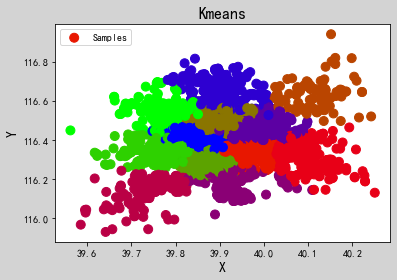

0     1482
8      930
9      786
6      741
2      677
1      650
3      567
5      565
10     446
11     369
4      227
7      108
dtype: int64
[[ 39.8498513  116.40689378]
 [ 39.91052645 116.63377075]
 [ 39.98411948 116.45122094]
 [ 39.92229984 116.1842025 ]
 [ 39.74605779 116.14968421]
 [ 40.08436557 116.33159252]
 [ 39.95348585 116.33999633]
 [ 40.11819204 116.63541158]
 [ 39.89505792 116.49327038]
 [ 39.87472136 116.29228366]
 [ 39.7777376  116.33801584]
 [ 39.77440253 116.54787575]]
0.39609094035276626
[0.58703117 0.54864064 0.38322945 ... 0.52550756 0.2273658  0.45116462]
(7548,)


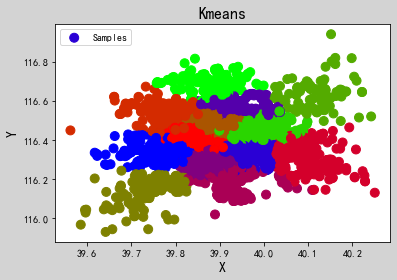

6     1418
8      883
3      787
1      736
11     642
5      566
4      565
2      484
0      446
7      367
12     320
9      227
10     107
dtype: int64
[[ 39.7777376  116.33801584]
 [ 39.95317044 116.33957987]
 [ 39.93057267 116.57863609]
 [ 39.87481598 116.29177428]
 [ 39.92248981 116.18371461]
 [ 40.08425143 116.33162751]
 [ 39.84946044 116.40498684]
 [ 39.77471023 116.54414318]
 [ 39.8889958  116.48179759]
 [ 39.74605779 116.14968421]
 [ 40.11900928 116.63597393]
 [ 39.98457934 116.44821273]
 [ 39.88917732 116.67809629]]
0.39463386223856883
[0.5754312  0.54902575 0.35894879 ... 0.52694008 0.22425048 0.30146175]
(7548,)


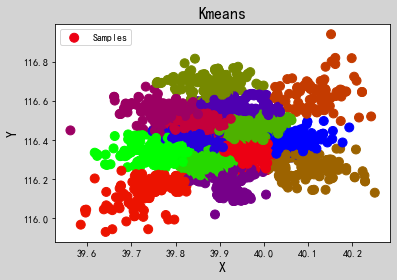

1     1338
11     803
12     780
5      736
6      730
3      557
2      513
13     446
0      380
4      320
10     320
9      292
7      227
8      106
dtype: int64
[[ 40.06721295 116.38676323]
 [ 39.8495716  116.40211609]
 [ 39.93052566 116.57561854]
 [ 39.91939894 116.18392712]
 [ 39.76973534 116.55153895]
 [ 39.86671946 116.48113235]
 [ 39.95303512 116.33996812]
 [ 39.74605779 116.14968421]
 [ 40.11887028 116.63733717]
 [ 40.09283515 116.28164741]
 [ 39.88917732 116.67809629]
 [ 39.95870334 116.45716368]
 [ 39.87485504 116.29188186]
 [ 39.7777376  116.33801584]]
0.39603181339692595
[0.59790294 0.54875098 0.54117243 ... 0.41254194 0.24285227 0.02789592]
(7548,)


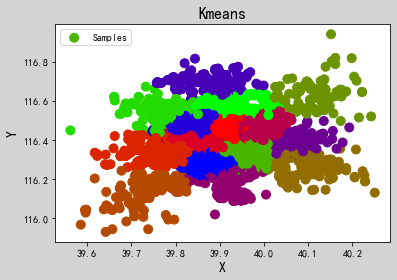

6     1293
0      778
12     743
7      663
4      554
1      539
14     492
8      446
5      433
3      370
2      313
13     303
10     288
9      227
11     106
dtype: int64
[[ 39.87481085 116.29125934]
 [ 39.84803738 116.48054794]
 [ 39.88934575 116.67944887]
 [ 40.06968112 116.38519616]
 [ 39.9196487  116.18368955]
 [ 39.98817758 116.45677667]
 [ 39.8497923  116.40071541]
 [ 39.91725288 116.46747716]
 [ 39.7777376  116.33801584]
 [ 39.74605779 116.14968421]
 [ 40.09283543 116.28069878]
 [ 40.11887028 116.63733717]
 [ 39.95282704 116.34074051]
 [ 39.76744953 116.55300191]
 [ 39.92740561 116.57979449]]
0.3915848523403812
[0.593679   0.54894768 0.02117274 ... 0.30707151 0.23887388 0.38461384]
(7548,)


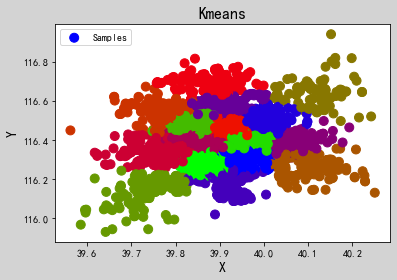

5     1303
15     713
8      629
0      578
2      556
13     533
14     460
3      449
6      444
4      370
7      312
9      299
1      287
10     286
12     227
11     102
dtype: int64
[[ 39.9467595  116.3218879 ]
 [ 39.99897894 116.50238489]
 [ 39.91913199 116.18380375]
 [ 39.91887065 116.58226047]
 [ 40.06883487 116.38445384]
 [ 39.84997661 116.40053967]
 [ 39.77745642 116.33808334]
 [ 39.88926667 116.679598  ]
 [ 39.91748552 116.47005174]
 [ 39.76592635 116.55238659]
 [ 40.09381701 116.28074699]
 [ 40.12061624 116.64075515]
 [ 39.74605779 116.14968421]
 [ 39.84790809 116.48013875]
 [ 39.9650393  116.39701442]
 [ 39.87058061 116.29143083]]
0.38729166698338474
[0.07296156 0.53425406 0.09463399 ... 0.31141533 0.26408933 0.42124911]
(7548,)


In [4]:
m=0
for i in list(range(2,17)):# KMeans聚类
    model = KMeans(n_clusters=i)
    y_pred = model.fit_predict(data[['endweidu','endjingdu']])

    # 画图显示样本数据
    plt.figure('Kmeans', facecolor='lightgray')
    plt.title('Kmeans', fontsize=16)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', fontsize=14)
    plt.tick_params(labelsize=10)
    plt.scatter(data['startweidu'], data['startjingdu'], s=80, c=y_pred, cmap='brg', label='Samples')
    plt.legend()
    plt.show()
    print(pd.value_counts(model.labels_))
    print(model.cluster_centers_)
    # 查看轮廓系数均值
    print(silhouette_score(data[['startweidu','startjingdu']],model.labels_))
    # 输出结果
    # 查看每一样本轮廓系数
    print(silhouette_samples(data[['startweidu','startjingdu']],model.labels_))
    # 输出结果
    # 查看样本轮廓系数结果的数组结构
    print(silhouette_samples(data[['startweidu','startjingdu']],model.labels_).shape)
    # 输出结果

In [5]:
print(pd.value_counts(model.labels_))
print(model.cluster_centers_)

5     1303
15     713
8      629
0      578
2      556
13     533
14     460
3      449
6      444
4      370
7      312
9      299
1      287
10     286
12     227
11     102
dtype: int64
[[ 39.9467595  116.3218879 ]
 [ 39.99897894 116.50238489]
 [ 39.91913199 116.18380375]
 [ 39.91887065 116.58226047]
 [ 40.06883487 116.38445384]
 [ 39.84997661 116.40053967]
 [ 39.77745642 116.33808334]
 [ 39.88926667 116.679598  ]
 [ 39.91748552 116.47005174]
 [ 39.76592635 116.55238659]
 [ 40.09381701 116.28074699]
 [ 40.12061624 116.64075515]
 [ 39.74605779 116.14968421]
 [ 39.84790809 116.48013875]
 [ 39.9650393  116.39701442]
 [ 39.87058061 116.29143083]]


In [6]:
# 导入轮廓系数所需要的库
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
 
# 查看轮廓系数均值
print(silhouette_score(data[['startweidu','startjingdu']],model.labels_))
# 输出结果
# 查看每一样本轮廓系数
print(silhouette_samples(data[['startweidu','startjingdu']],model.labels_))
# 输出结果
# 查看样本轮廓系数结果的数组结构
print(silhouette_samples(data[['startweidu','startjingdu']],model.labels_).shape)
# 输出结果

0.38729166698338474
[0.07296156 0.53425406 0.09463399 ... 0.31141533 0.26408933 0.42124911]
(7548,)


In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
print(data)

       id   carid  startday starttime  startweidu  startjingdu    endday  \
0       4  459074  1/5/2018  06:09:49   39.970322   116.351395  1/5/2018   
1       3  420604  1/5/2018  06:07:14   39.756088   116.312943  1/5/2018   
2       5  165558  1/5/2018  06:17:56   39.953842   116.436539  1/5/2018   
3      29  258590  1/5/2018  08:09:42   39.850845   116.488724  1/5/2018   
4      28  373864  1/5/2018  08:08:09   39.986801   116.442032  1/5/2018   
...   ...     ...       ...       ...         ...          ...       ...   
7543  759  299501  3/5/2018  13:57:37   39.955215   116.358261  3/5/2018   
7544  757  375130  3/5/2018  13:48:34   39.787674   116.326675  3/5/2018   
7545  756   29137  3/5/2018  13:47:58   39.776688   116.514816  3/5/2018   
7546  755  119594  3/5/2018  13:46:46   39.930496   116.236038  3/5/2018   
7547  758  373632  3/5/2018  13:49:44   39.925003   116.509323  3/5/2018   

       endtime   endweidu   endjingdu  行驶距离（km）  收取费用(元)      公里数单价  
0     07:00:24  3

簇数为 2 ，轮廓系数均值为 0.3554167874453217


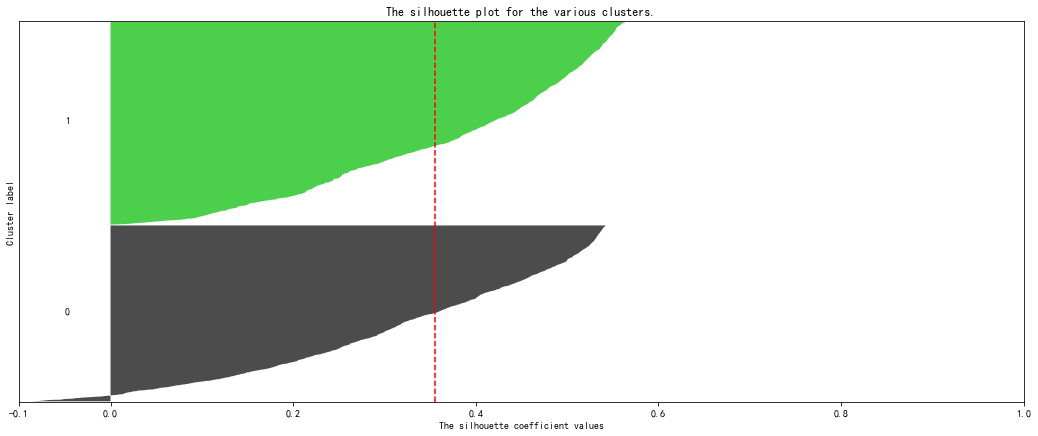

簇数为 3 ，轮廓系数均值为 0.3392548027424869


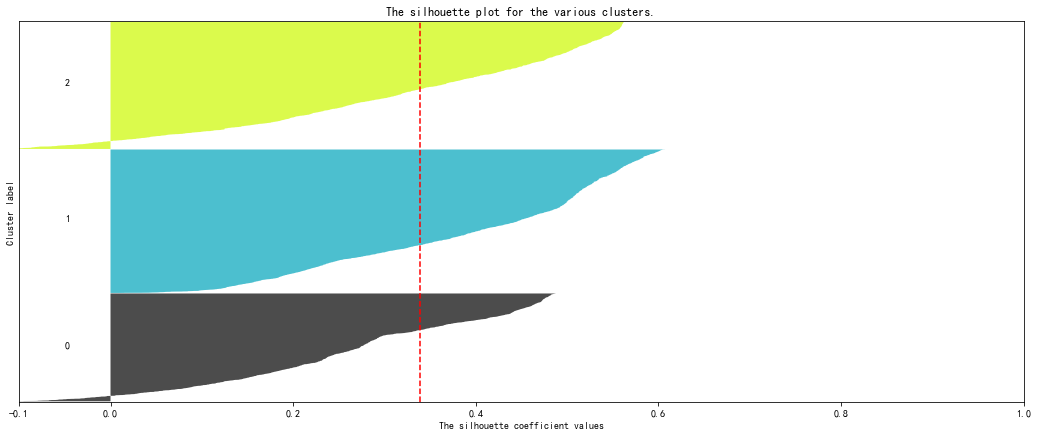

簇数为 4 ，轮廓系数均值为 0.3858480838550429


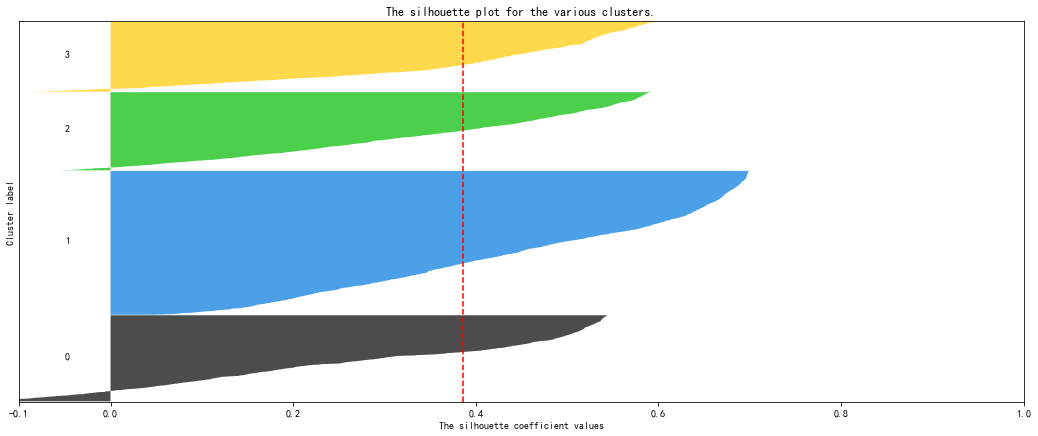

簇数为 5 ，轮廓系数均值为 0.35671330528135303


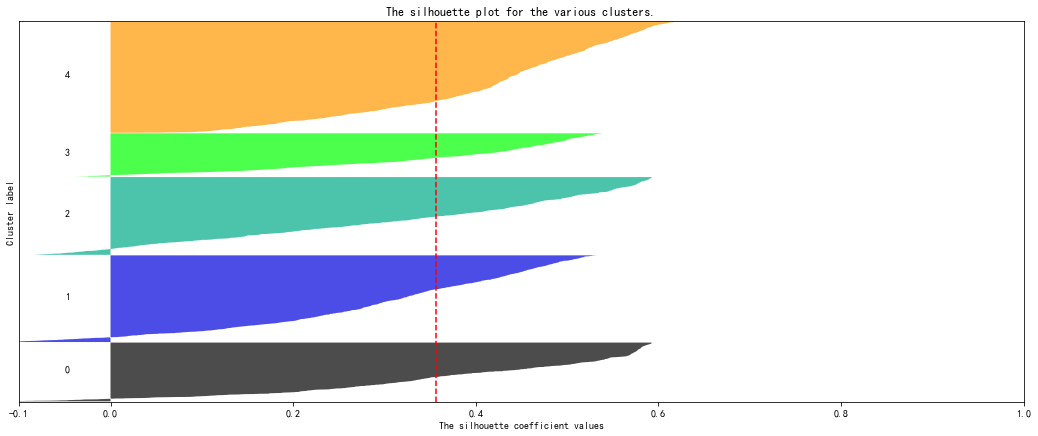

簇数为 6 ，轮廓系数均值为 0.3752796191726017


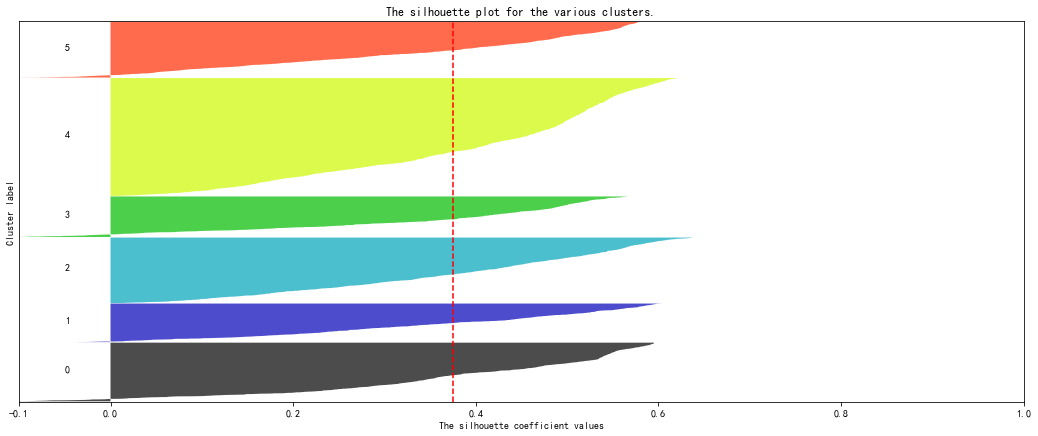

簇数为 7 ，轮廓系数均值为 0.3751414340928068


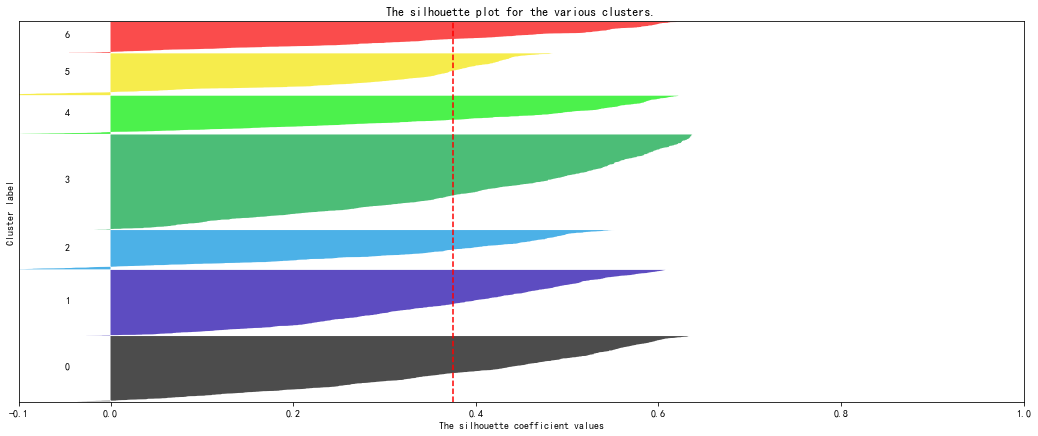

簇数为 8 ，轮廓系数均值为 0.3922748502293382


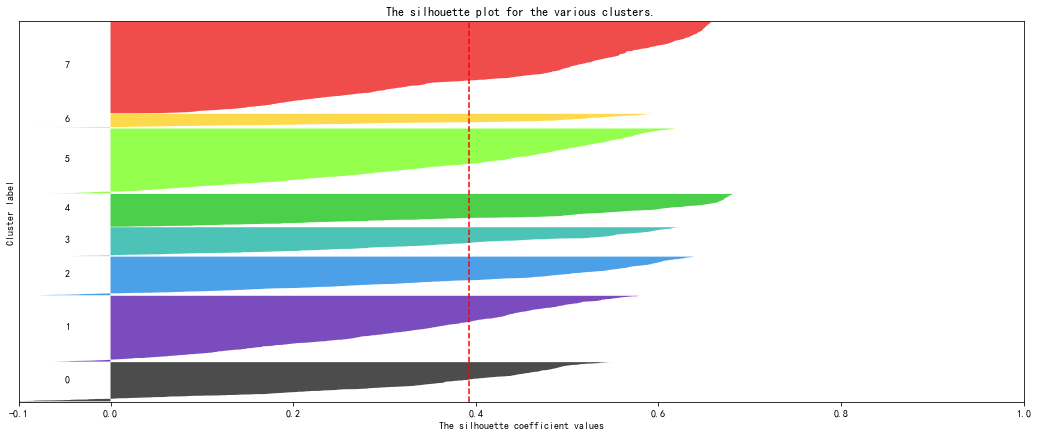

簇数为 10 ，轮廓系数均值为 0.4141627263169435


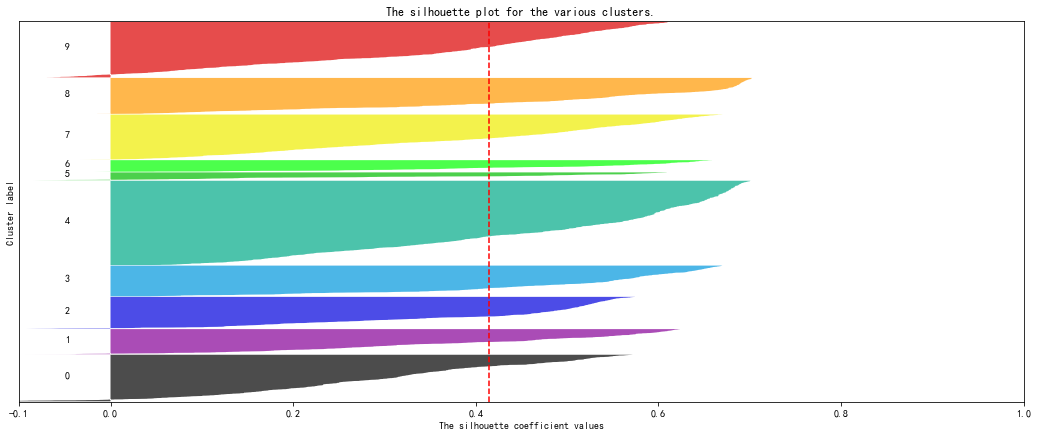

簇数为 12 ，轮廓系数均值为 0.41104122480232974


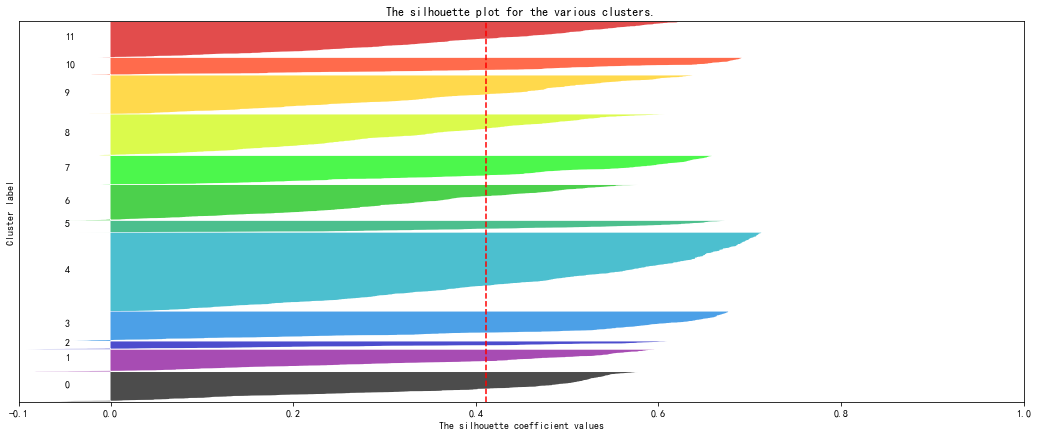

簇数为 13 ，轮廓系数均值为 0.4144403912091313


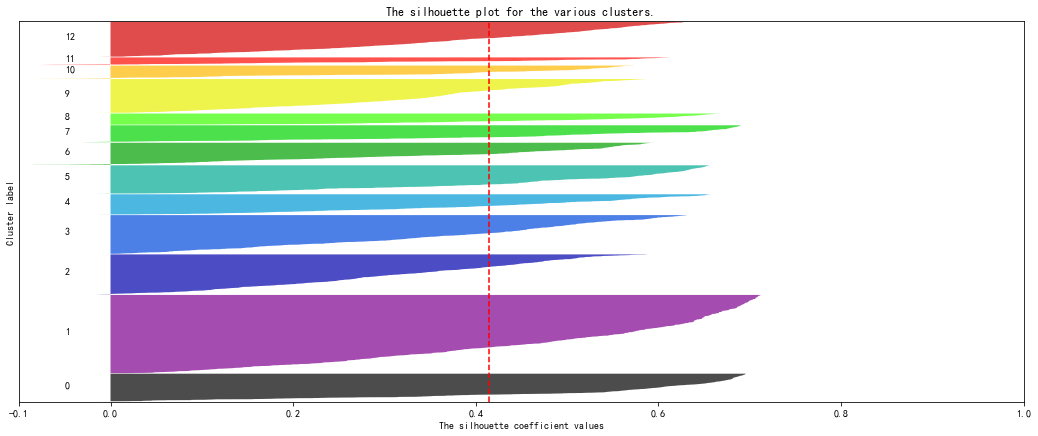

簇数为 16 ，轮廓系数均值为 0.39611134332269404


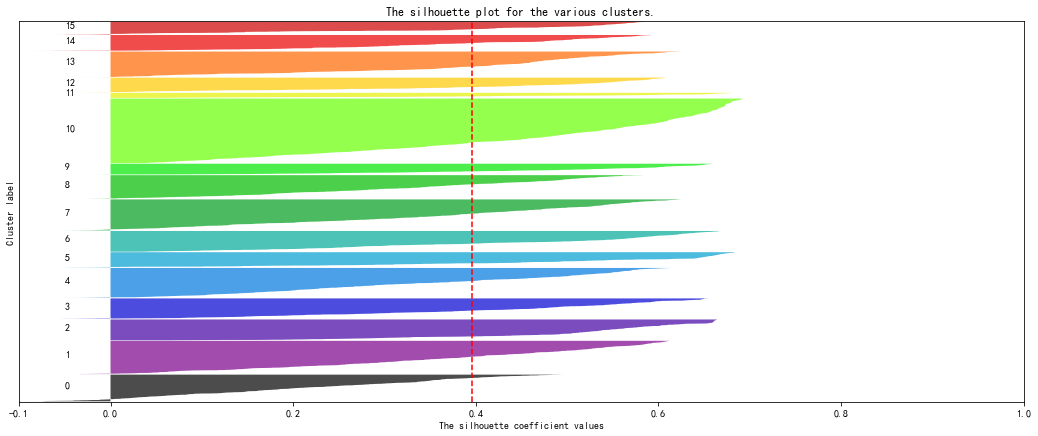

In [8]:
data = np.array(data[['startweidu','startjingdu']],type(float))
X=data
cluster_labels=model
for n_clusters in [2,3,4,5,6,7,8,10,12,13,16]:
    n_clusters = n_clusters
    # 设置画布
    fig, ax1 = plt.subplots(1)
    # 设置画布尺寸
    fig.set_size_inches(18, 7)
    # 设置画布X轴
    ax1.set_xlim([-0.1, 1])
    # 设置画布Y轴：X.shape[0]代表着柱状的宽度，(n_clusters + 1) * 10代表着柱与柱之间的间隔
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
    # 模型实例化
    clusterer = KMeans(n_clusters=n_clusters, random_state=100)
    # 开始训练模型
    clusterer = clusterer.fit(X)
    # 提取训练结果中的预测标签
    cluster_labels = clusterer.labels_
    # 提取训练结果中的轮廓系数均值
    silhouette_avg = silhouette_score(X, cluster_labels)
    # 打印出当前的簇数与轮廓系数均值
    print("簇数为", n_clusters,
          "，轮廓系数均值为", silhouette_avg)
    # 提取每一个样本的轮廓系数
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    # 设置Y轴的起始坐标
    y_lower = 10
    # 添加一个循环，把每一个样本的轮廓系数画在图中
    for i in range(n_clusters):
        # 提取第i个簇下的所有样本轮廓系数
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        # 对样本的轮廓系数进行排序（降序）
        ith_cluster_silhouette_values.sort()
        # 设置当前簇的柱状宽度（使用样本数量）以便于设置下一个簇的起始坐标
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        # 设置Y轴第i个簇的起始坐标
        y_upper = y_lower + size_cluster_i
        # 设置颜色
        color = cm.nipy_spectral(float(i)/n_clusters)
        # 画图
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                         ,ith_cluster_silhouette_values
                         ,facecolor=color
                         ,alpha=0.7
                         )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10
    # 设置图的标题
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # 添加轮廓系数均值线，使用虚线
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

In [9]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2, min_samples=8).fit(data[['startweidu','startjingdu']])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='startweidu',y='startjingdu',c='Cluster ID', colormap='jet')

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_25580/3744200012.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  db = DBSCAN(eps=2, min_samples=8).fit(data[['startweidu','startjingdu']])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
plt.scatter(data['startday'],data['starttime'],s=20)
plt.title('wuyizchangjia')
plt.savefig('dingjia')
plt.show()